
<h1 align="center">  Machine Learning Algorithms for Anxiety Classfication on oVRcome Dataset </h1>



<h1>  HRV dataset with stats - Label : low-1, low to mid-2 , mid to high-3 , high-4</h1>


<h1>Table of contents</h1>
<ul>   
    <li><a href="#lib">Libraries</a> </li>  
    <li><a href="#Data_prep"> Data Preparation </a></li>
    <li><a href="#lr"> Logistic Regression </a></li>
    <li><a href="#knn"> k-Nearest Neighbors (k-NN) </a></li> 
    <li><a href="#nb"> Naive Bayes </a></li>
    <li><a href="#svm_linear"> Linear SVM </a></li>
    <li><a href="#svm_rbf"> RBF SVM </a></li>
    <li><a href="#dtree"> Decision Tree </a></li>
    <li><a href="#rf"> Random Forest </a></li>
    <li><a href="#qda"> Quadratic Discriminant Analysis </a></li>
    <li><a href="#mlp"> Multi-layer Perceptron </a></li>
    <li><a href="#vc"> Voting Classifier </a></li>
    <li><a href="#vc"> Boosting Classifier </a></li>
</ul> 


## Import Libraries <a name="lib"></a>

In [2]:
# Load libraries
import os

from numpy import mean
from numpy import std
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.metrics import confusion_matrix


from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.preprocessing as pp
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from scipy import stats
import heapq
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.ticker import NullFormatter
# from matplotlib.ticker import ticker

from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from collections import defaultdict



import warnings
warnings.filterwarnings('ignore')


## Input Dataset Processing

In [3]:
Dataset_Path = "C:\\dev\\Alaeddins_ML\\Dataset\\"
Dataset_filename = "garmin_data_processed.csv"

Dataset_File = Dataset_Path + Dataset_filename

In [4]:
Dataset = pd.read_csv(Dataset_File)

# Input Data Description

In [5]:
# descriptions
print(Dataset.describe())

         condition           HR          HRV
count  4458.000000  4458.000000  4458.000000
mean      1.489457    76.637281   807.597802
std       0.499945    11.790487   159.634674
min       1.000000    48.000000   528.000000
25%       1.000000    73.000000   702.000000
50%       1.000000    81.000000   749.000000
75%       2.000000    85.000000   845.000000
max       2.000000    97.000000  1425.000000


In [6]:
Dataset.head()

,pId,condition,timestamp,HR,HRV
0,p001_tamil_iteration1,2,2023-04-12T09:35:16.729+12:00,51.0,1270.0
1,p001_tamil_iteration1,2,2023-04-12T09:35:16.892+12:00,51.0,1270.0
2,p001_tamil_iteration1,2,2023-04-12T09:35:18.275+12:00,51.0,1358.0
3,p001_tamil_iteration1,2,2023-04-12T09:35:19.738+12:00,51.0,1425.0
4,p001_tamil_iteration1,2,2023-04-12T09:35:19.741+12:00,50.0,1425.0


In [7]:
# input PID distribution
print(Dataset.groupby('pId').size())

pId
p001_tamil_iteration1    186
p001_tamil_iteration2    182
p001_tamil_iteration3    208
p001_tamil_iteration4    188
p002_s1                  348
p002_s2                  308
p002_s3                  313
p002_s4                  327
p003_s1                  277
p003_s2                  273
p003_s3                  302
p003_s4                  530
p004_s3                  350
p004_s4                  666
dtype: int64


In [8]:
# class_1 distribution
print(Dataset.groupby('condition').size())

condition
1    2276
2    2182
dtype: int64


array([[<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'HR'}>],
       [<Axes: title={'center': 'HRV'}>, <Axes: >]], dtype=object)

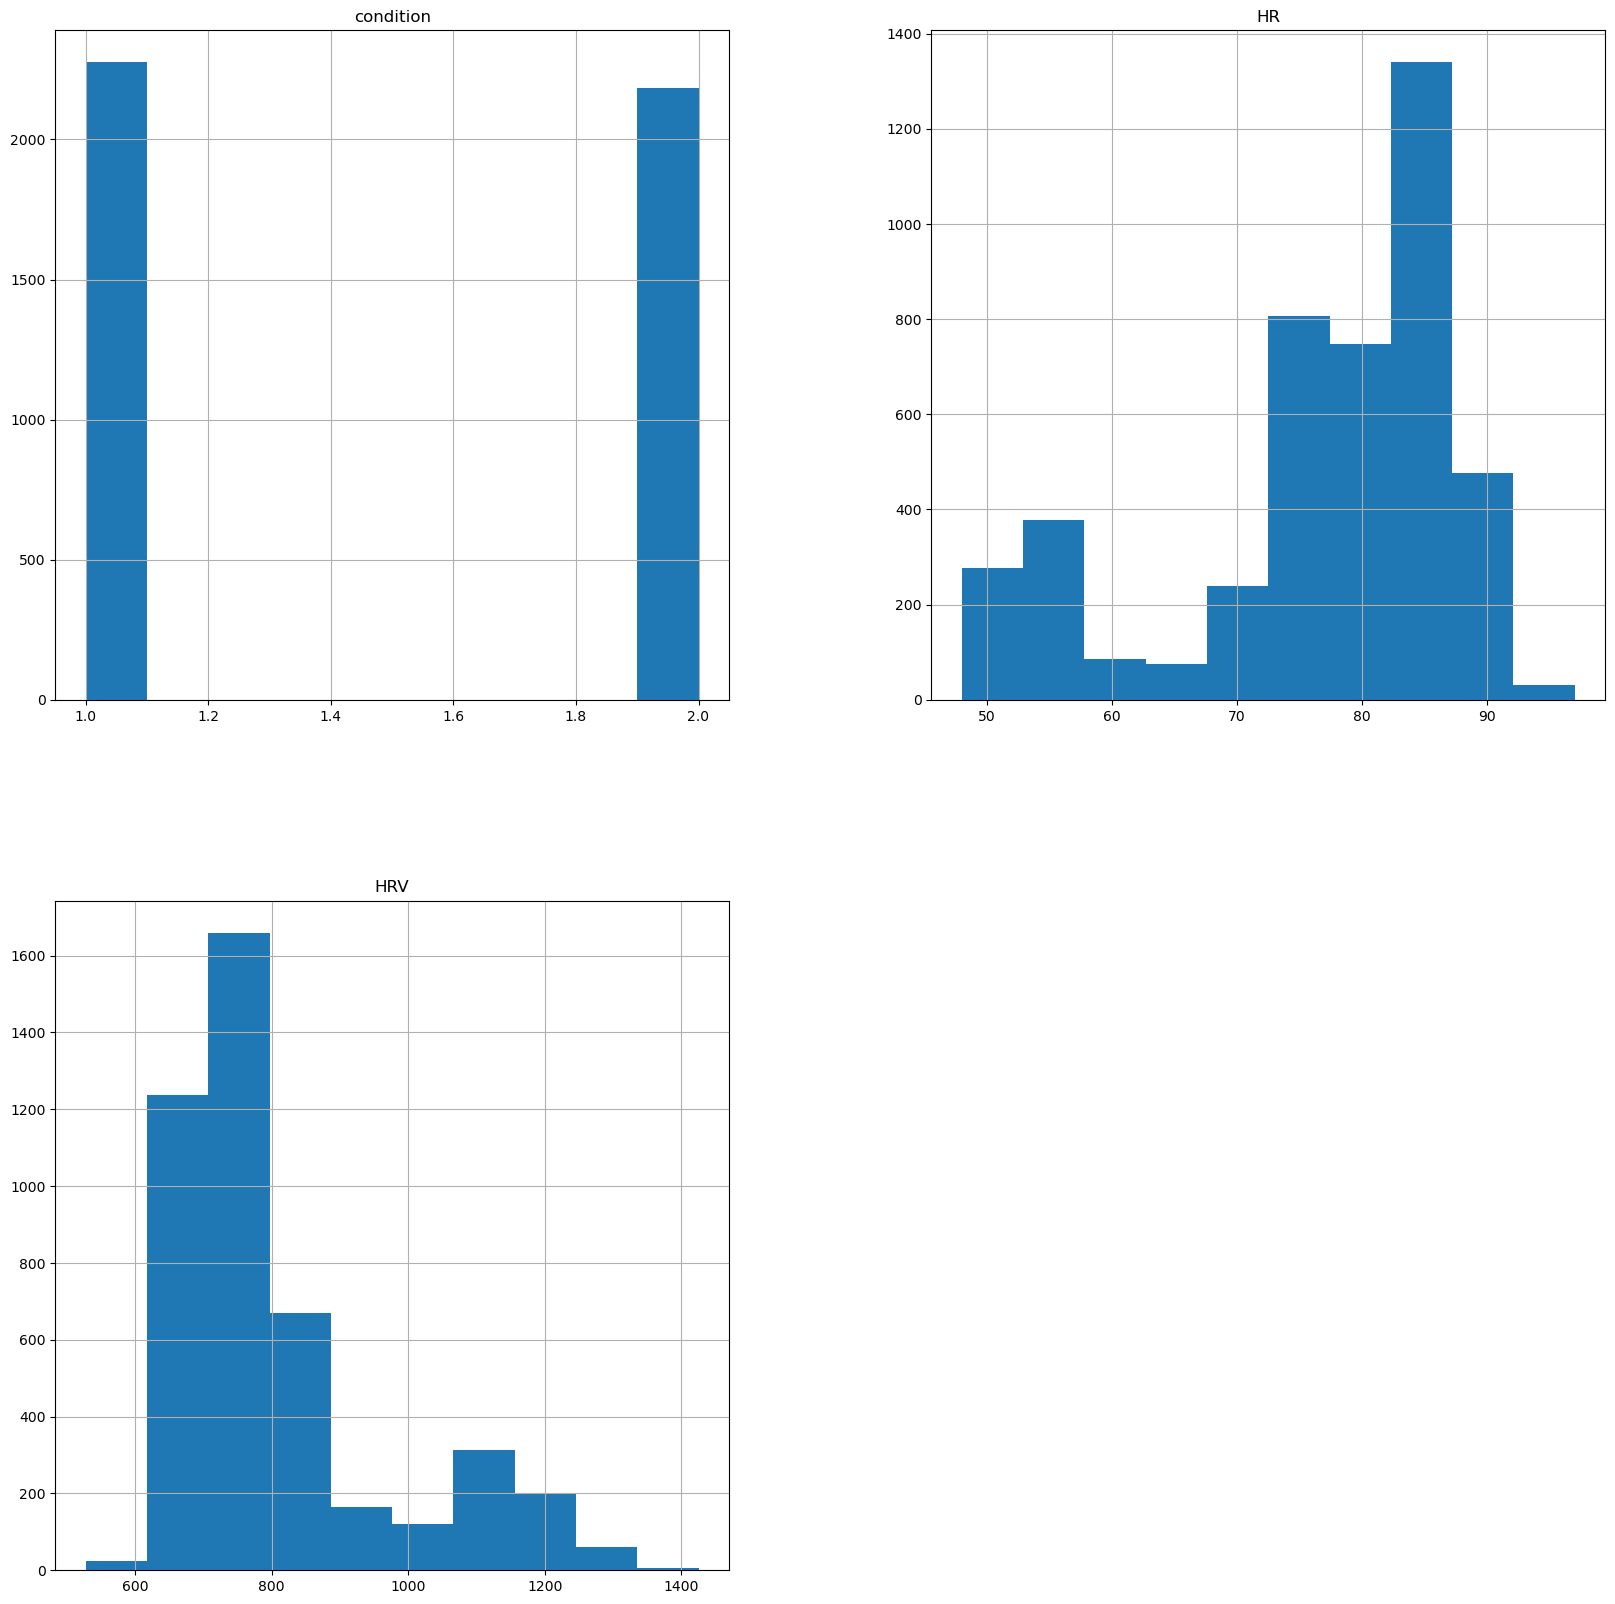

In [9]:
Dataset.hist(figsize=(20,20))

In [10]:
X = Dataset.loc[:,['HR','HRV']]

In [11]:
# Label- Data Description

Y1 = Dataset['condition']



In [12]:
X.describe()

,HR,HRV
count,4458.000000,4458.000000
mean,76.637281,807.597802
std,11.790487,159.634674
min,48.000000,528.000000
25%,73.000000,702.000000
50%,81.000000,749.000000
75%,85.000000,845.000000
max,97.000000,1425.000000


In [13]:
Y1.describe()

count    4458.000000
mean        1.489457
std         0.499945
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: condition, dtype: float64

In [14]:
scaler_STD = StandardScaler()
X_STD = scaler_STD.fit_transform(X)


In [15]:
X_STD= pd.DataFrame(X_STD)
X_STD.describe()

,0,1
count,4.458000e+03,4.458000e+03
mean,5.355369e-16,3.570246e-16
std,1.000112e+00,1.000112e+00
min,-2.429119e+00,-1.751682e+00
25%,-3.085275e-01,-6.615709e-01
50%,3.700617e-01,-3.671156e-01
75%,7.093563e-01,2.343250e-01
max,1.727240e+00,3.868028e+00


In [16]:
# Normalise - minmax fun

### can be used for algo like SVM or Non tree based algos

In [17]:
scaler_NORM = MinMaxScaler()
X_NORM = scaler_NORM.fit_transform(X)

In [18]:
X_NORM = pd.DataFrame(X_NORM)
X_NORM.describe()

,0,1
count,4458.000000,4458.000000
mean,0.584434,0.311703
std,0.240622,0.177965
min,0.000000,0.000000
25%,0.510204,0.193980
50%,0.673469,0.246377
75%,0.755102,0.353400
max,1.000000,1.000000


In [19]:
# Train_Test SPlt

In [20]:

# X - Y1(Input - label valence) split
X_Train, X_Test, y1_Train, y1_Test = train_test_split(X,Y1, test_size=0.2, random_state=42, stratify=Y1)

#X_STD

X_STD_Train, X_STD_Test, y1_Train, y1_Test = train_test_split(X_STD,Y1, test_size=0.2, random_state=42, stratify=Y1)

#X_NORM

X_NORM_Train, X_NORM_Test, y1_Train, y1_Test = train_test_split(X_NORM,Y1, test_size=0.2, random_state=42, stratify=Y1)

# ML Algorithims

## Non Tree Algo Trails:
1. Logestic regression
2. SVM
3. Naive Bayes
4. QDA
5. KNN


## Tree Based ALgo Trials:
1. Decision Tree
2. Random Forest

## Ensemble Models
1. Voting Classifier
2. Adaboost
3. GBM
4. XGboost

## Neural Network algo Trails

1. MLP

In [21]:
# Randomized search 
# Stratified K fold 
# Hy[er Parameter tuning

import warnings; warnings.filterwarnings('ignore')

def run_classifier(clf, param_grid, title, X_train, y_train, X_test, y_test ):
    # -----------------------------------------------------
    cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    # Randomized grid search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf, 
                            param_distributions = param_grid,
                            n_iter = n_iter_search, 
                            cv = cv, 

                            scoring= 'accuracy')
    # -----------------------------------------------------
    # Train model
    gs.fit(X_train, y_train)  
    print("The best parameters are %s" % (gs.best_params_)) 
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    # -----------------------------------------------------
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))
    # -----------------------------------------------------
       # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)#, labels= target_names)
    print(cm)
    fig, (ax2) = plt.subplots(1, 1, figsize=(3,3))
    #cm = confusion_matrix(y_test, y_pred)#, labels= target_names)
   # sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
    #ax1.set_title("Confusion Matrix")
    #ax1.set_xlabel("Predicted class")
    #ax1.set_ylabel("Actual class")
    #ax1.set_xticklabels(target_names)
    #ax1.set_yticklabels(target_names)
    
    ncm = cm/cm.astype(np.float).sum(axis=1)
    sns.heatmap(ncm, annot = True, cbar = False, fmt = ".2%", linewidths = .5, cmap = "Blues", ax = ax2)
    ax2.set_title("Confusion Matrix _ accuracy ")
    ax2.set_xlabel("Predicted class")
    ax2.set_ylabel("Actual class")
    #ax2.set_xticklabels(target_names)
    #ax2.set_yticklabels(target_names)
    plt.show()
    

##  Logistic Regression

In [22]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

param_grid = {'penalty': ['l1','l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


The best parameters are {'solver': 'sag', 'penalty': 'l2'}
Accuracy score: 58.07%
Precision score: 58.46%
Recall score: 58.07%
[[230 225]
 [149 288]]


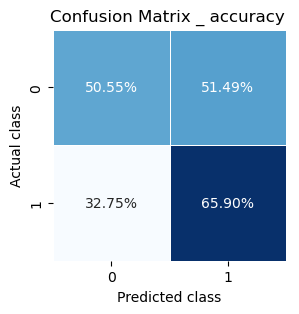

In [23]:
# Y1

run_classifier(lr, param_grid, 'Logistic Regression', X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'solver': 'liblinear', 'penalty': 'l2'}
Accuracy score: 59.08%
Precision score: 59.17%
Recall score: 59.08%
[[258 197]
 [168 269]]


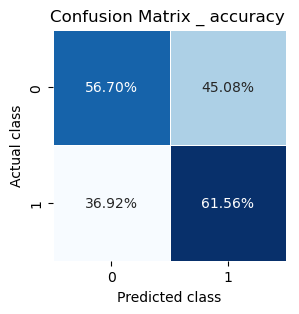

In [24]:
#Y1 - norm

run_classifier(lr, param_grid, 'Logistic Regression', X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'solver': 'saga', 'penalty': 'l1'}
Accuracy score: 58.52%
Precision score: 58.54%
Recall score: 58.52%
[[266 189]
 [181 256]]


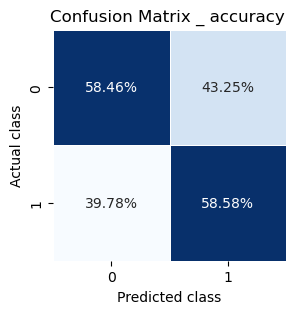

In [25]:
#Y1 - std
run_classifier(lr, param_grid, 'Logistic Regression', X_STD_Train,  y1_Train, X_STD_Test, y1_Test )

## KNN

In [26]:
# KNN

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,100), 
             'weights': ['uniform', 'distance'],
             'leaf_size':[1, 3, 5, 7, 10],
             'algorithm':['auto', 'kd_tree']}



The best parameters are {'weights': 'distance', 'n_neighbors': 13, 'leaf_size': 7, 'algorithm': 'kd_tree'}
Accuracy score: 82.62%
Precision score: 82.82%
Recall score: 82.62%
[[396  59]
 [ 96 341]]


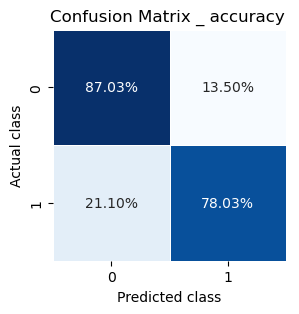

In [27]:
# Y1

run_classifier(knn, param_grid, 'Nearest Neighbors', X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'weights': 'distance', 'n_neighbors': 88, 'leaf_size': 7, 'algorithm': 'kd_tree'}
Accuracy score: 82.62%
Precision score: 82.92%
Recall score: 82.62%
[[400  55]
 [100 337]]


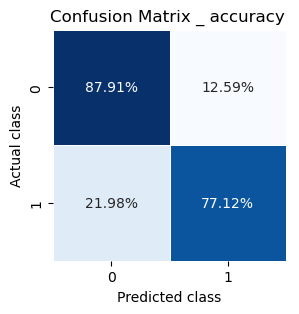

In [28]:
#Y1 - norm

run_classifier(knn, param_grid, 'Nearest Neighbors', X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'weights': 'distance', 'n_neighbors': 80, 'leaf_size': 3, 'algorithm': 'auto'}
Accuracy score: 82.06%
Precision score: 82.32%
Recall score: 82.06%
[[396  59]
 [101 336]]


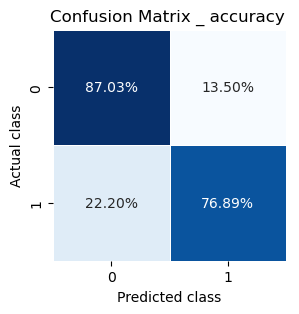

In [29]:
# Y1 - std

run_classifier(knn, param_grid, 'Nearest Neighbors',  X_STD_Train,  y1_Train, X_STD_Test, y1_Test )

## Naive Bayes

In [30]:
# Naive bayes

nb = GaussianNB()

param_grid = {'priors': [None]}



The best parameters are {'priors': None}
Accuracy score: 68.95%
Precision score: 69.34%
Recall score: 68.95%
[[352 103]
 [174 263]]


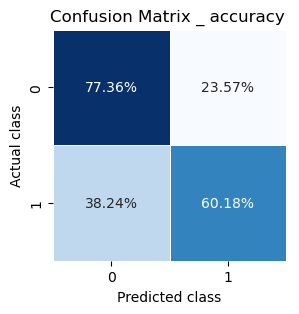

In [31]:
# Y1
run_classifier(nb, param_grid, 'Naive Bayes', X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'priors': None}
Accuracy score: 68.95%
Precision score: 69.34%
Recall score: 68.95%
[[352 103]
 [174 263]]


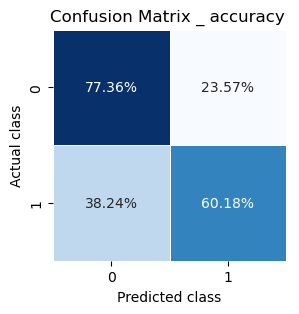

In [32]:
# Y1 -norm
run_classifier(nb, param_grid, 'Naive Bayes',  X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'priors': None}
Accuracy score: 68.95%
Precision score: 69.34%
Recall score: 68.95%
[[352 103]
 [174 263]]


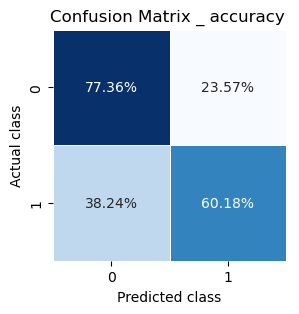

In [33]:
# Y1 - std
run_classifier(nb, param_grid, 'Naive Bayes',  X_STD_Train,  y1_Train, X_STD_Test, y1_Test)

## QDA

In [34]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

param_grid = {'priors': [None], 
              'reg_param': np.arange(0., 1., 0.1)}



The best parameters are {'reg_param': 0.0, 'priors': None}
Accuracy score: 65.92%
Precision score: 66.73%
Recall score: 65.92%
[[258 197]
 [107 330]]


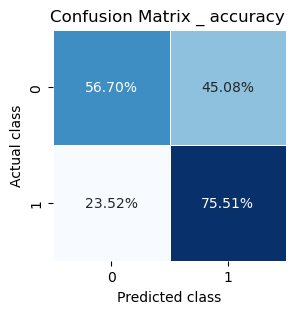

In [35]:
# Y1
run_classifier(qda, param_grid, "QDA", X_Train, y1_Train, X_Test, y1_Test )

The best parameters are {'reg_param': 0.0, 'priors': None}
Accuracy score: 65.92%
Precision score: 66.73%
Recall score: 65.92%
[[258 197]
 [107 330]]


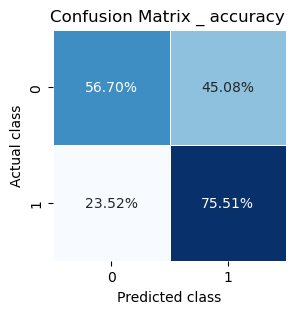

In [36]:
# Y1 - norm 
run_classifier(qda, param_grid, "QDA", X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'reg_param': 0.6000000000000001, 'priors': None}
Accuracy score: 66.82%
Precision score: 67.00%
Recall score: 66.82%
[[288 167]
 [129 308]]


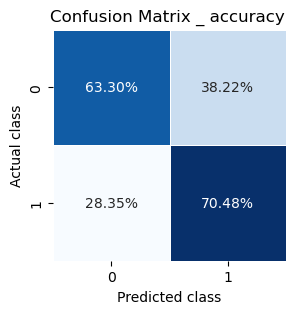

In [37]:
# Y1 - std 
run_classifier(qda, param_grid, "QDA",  X_STD_Train,  y1_Train, X_STD_Test,y1_Test )

## SVM

In [38]:
#SVM

from sklearn.svm import SVC
svc = SVC(probability=True) 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}



The best parameters are {'kernel': 'rbf', 'gamma': 1, 'C': 100}
Accuracy score: 81.39%
Precision score: 81.53%
Recall score: 81.39%
[[388  67]
 [ 99 338]]


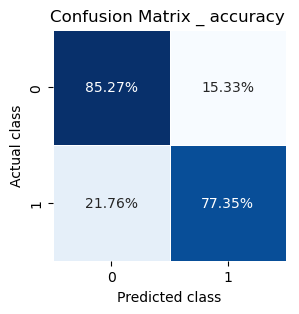

In [39]:
# Y1
run_classifier(svc, param_grid, "SVM", X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}
Accuracy score: 68.95%
Precision score: 68.94%
Recall score: 68.95%
[[317 138]
 [139 298]]


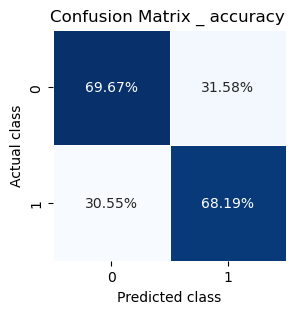

In [40]:
# Y1 - norm
run_classifier(svc, param_grid, "SVM",  X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'kernel': 'rbf', 'gamma': 1, 'C': 10}
Accuracy score: 71.19%
Precision score: 71.27%
Recall score: 71.19%
[[344 111]
 [146 291]]


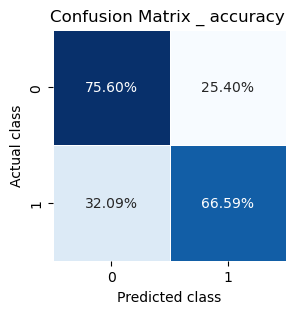

In [41]:
# Y1 - std
run_classifier(svc, param_grid, "SVM",  X_STD_Train,  y1_Train, X_STD_Test, y1_Test )

## Tree Based ALGOS

## Decision tree

In [42]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 20, 2),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'max_features': ['auto', 'sqrt', 'log2', None]}



The best parameters are {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 19, 'criterion': 'gini'}
Accuracy score: 78.81%
Precision score: 79.72%
Recall score: 78.81%
[[401  54]
 [135 302]]


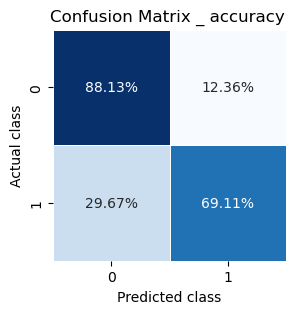

In [43]:
# Y1
run_classifier(dtree, param_grid, "Decision Tree", X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 19, 'criterion': 'entropy'}
Accuracy score: 81.73%
Precision score: 81.87%
Recall score: 81.73%
[[390  65]
 [ 98 339]]


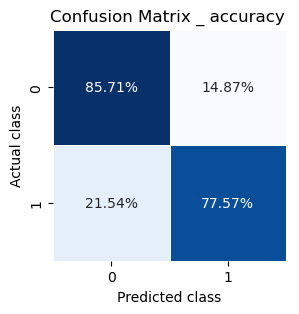

In [44]:
# Y1 - norm 
run_classifier(dtree, param_grid, "Decision Tree", X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 19, 'criterion': 'gini'}
Accuracy score: 82.17%
Precision score: 82.42%
Recall score: 82.17%
[[396  59]
 [100 337]]


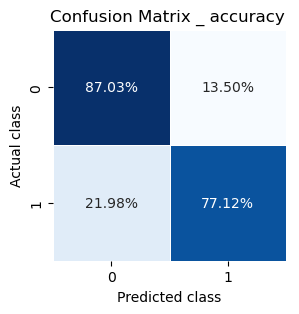

In [45]:
# Y1 -std
run_classifier(dtree, param_grid, "Decision Tree",  X_STD_Train,  y1_Train, X_STD_Test, y1_Test)

## Random Forrest

In [46]:
# Random Forrest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}



The best parameters are {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Accuracy score: 82.06%
Precision score: 82.14%
Recall score: 82.06%
[[387  68]
 [ 92 345]]


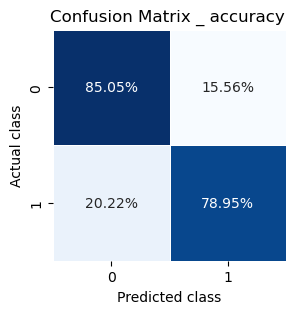

In [47]:

# Y1
run_classifier(rf, param_grid, 'Random Forest', X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': True}
Accuracy score: 81.50%
Precision score: 81.58%
Recall score: 81.50%
[[385  70]
 [ 95 342]]


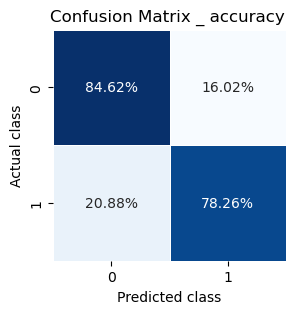

In [48]:

# Y1 -norm
run_classifier(rf, param_grid, 'Random Forest', X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}
Accuracy score: 82.85%
Precision score: 82.92%
Recall score: 82.85%
[[390  65]
 [ 88 349]]


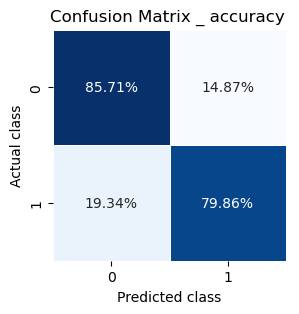

In [49]:

# Y1 -std
run_classifier(rf, param_grid, 'Random Forest', X_STD_Train,  y1_Train, X_STD_Test, y1_Test )

## Boosting Methods

## AdaBoost Classifier

In [50]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid =  {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,100,250,1000],
              'learning_rate':[0.01,0.1]}

The best parameters are {'n_estimators': 250, 'learning_rate': 0.1, 'base_estimator__min_samples_leaf': 5, 'base_estimator__max_depth': 6}
Accuracy score: 83.74%
Precision score: 83.80%
Recall score: 83.74%
[[393  62]
 [ 83 354]]


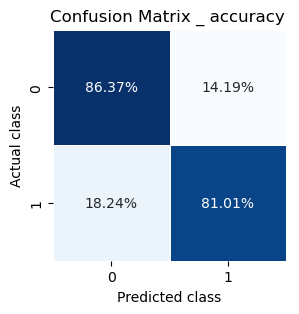

In [51]:
# Y1
run_classifier(abc, param_grid, "Adaboost", X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'n_estimators': 1000, 'learning_rate': 0.1, 'base_estimator__min_samples_leaf': 5, 'base_estimator__max_depth': 4}
Accuracy score: 83.30%
Precision score: 83.31%
Recall score: 83.30%
[[387  68]
 [ 81 356]]


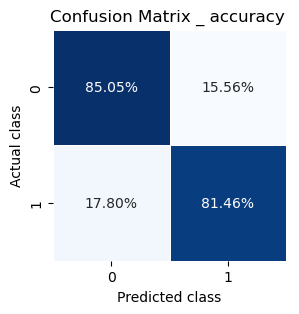

In [52]:
# Y1 - norm 
run_classifier(abc, param_grid, "Adaboost", X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'n_estimators': 250, 'learning_rate': 0.1, 'base_estimator__min_samples_leaf': 5, 'base_estimator__max_depth': 10}
Accuracy score: 82.85%
Precision score: 82.85%
Recall score: 82.85%
[[383  72]
 [ 81 356]]


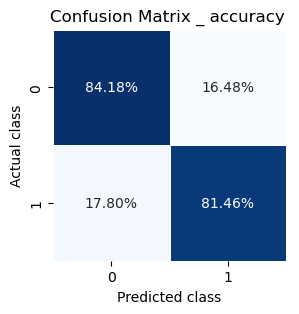

In [53]:
# Y1 -std 
run_classifier(abc, param_grid, "Adaboost", X_STD_Train,  y1_Train, X_STD_Test, y1_Test )

## SGD BOOST

In [54]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
sgdb = GradientBoostingClassifier()

param_grid =  {'max_depth':[i for i in range(2,11,2)],
              'min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

The best parameters are {'n_estimators': 50, 'min_samples_leaf': 5, 'max_depth': 8, 'learning_rate': 0.1}
Accuracy score: 79.93%
Precision score: 80.31%
Recall score: 79.93%
[[392  63]
 [116 321]]


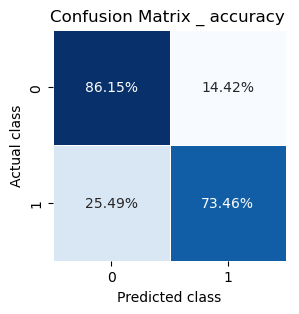

In [55]:
# Y1
run_classifier(sgdb, param_grid, "GradientBoosting", X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'n_estimators': 250, 'min_samples_leaf': 5, 'max_depth': 8, 'learning_rate': 0.1}
Accuracy score: 82.96%
Precision score: 83.07%
Recall score: 82.96%
[[393  62]
 [ 90 347]]


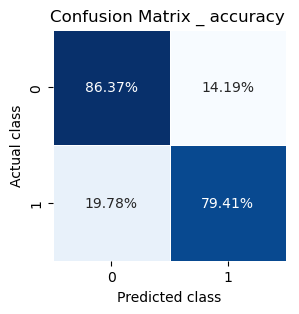

In [56]:
# Y1 - norm 
run_classifier(sgdb, param_grid, "GradientBoosting",  X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'n_estimators': 1000, 'min_samples_leaf': 5, 'max_depth': 6, 'learning_rate': 0.1}
Accuracy score: 82.74%
Precision score: 82.75%
Recall score: 82.74%
[[384  71]
 [ 83 354]]


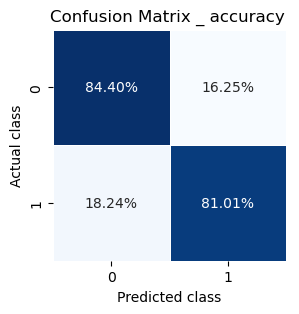

In [57]:
# Y1 - std
run_classifier(sgdb, param_grid, "GradientBoosting",  X_STD_Train,  y1_Train, X_STD_Test, y1_Test )

## MLP

In [58]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10), (50, 50)],
             'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'alpha': np.logspace(-5, 3, 5),
             'learning_rate': ['constant', 'invscaling','adaptive'],
             'max_iter': [100, 500, 1000]}



The best parameters are {'solver': 'adam', 'max_iter': 100, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (10, 10), 'alpha': 10.0, 'activation': 'tanh'}
Accuracy score: 65.47%
Precision score: 66.53%
Recall score: 65.47%
[[362  93]
 [215 222]]


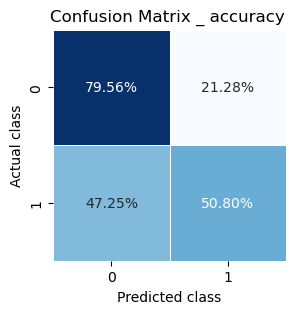

In [59]:
#Y1
run_classifier(mlp, param_grid, 'Neural Net', X_Train,  y1_Train, X_Test, y1_Test )

The best parameters are {'solver': 'lbfgs', 'max_iter': 500, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'logistic'}
Accuracy score: 71.41%
Precision score: 72.59%
Recall score: 71.41%
[[381  74]
 [181 256]]


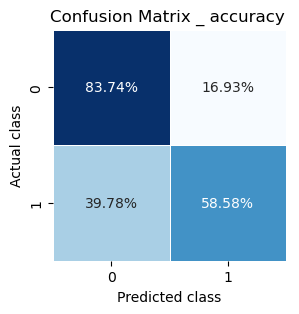

In [60]:
#Y1 - norm
run_classifier(mlp, param_grid, 'Neural Net', X_NORM_Train,  y1_Train, X_NORM_Test, y1_Test )

The best parameters are {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 1e-05, 'activation': 'relu'}
Accuracy score: 72.87%
Precision score: 74.85%
Recall score: 72.87%
[[399  56]
 [186 251]]


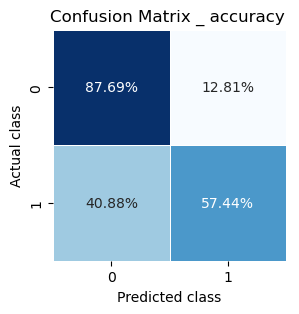

In [61]:
#Y1 - std
run_classifier(mlp, param_grid, 'Neural Net', X_STD_Train,  y1_Train, X_STD_Test, y1_Test )

## Voting Classifier

The best parameters are {'weights': [1, 1]}
Accuracy score: 82.74%
Precision score: 82.76%
Recall score: 82.74%
[[385  70]
 [ 84 353]]


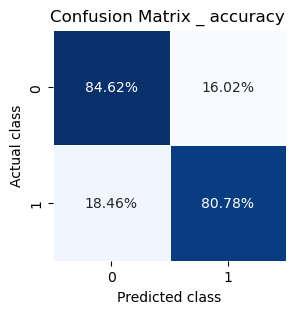

In [62]:
from sklearn.ensemble import VotingClassifier


#Choosing the best peforming models from the top classification trials

vc = VotingClassifier(estimators=[('knn', knn), ('DT',dtree )],
                        voting='soft')

param_grid = {'weights': [[1, 1], [2, 1]] }

run_classifier(vc, param_grid, "Voting Classifier",  X_Train,  y1_Train, X_Test, y1_Test)

# Best Model Results and Export Model

In [63]:
best_model = abc

best_model.fit(X_NORM,Y1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [64]:
import pickle
 
# save the model to disk
filename = 'Final_MODEL.pkl'
pickle.dump(best_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_NORM_Test, y1_Test)
print(result)

0.9260089686098655
